In [1]:
from IPython.display import Image, HTML
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


# Introduction to Scientific Programming in Python

## Python Course Lecture 8a: Data Files and Relational Databases

# Files

## Files are Stored on Hard Disks
  - Permanent Storage:
    - **Magnetic Hard Disks**: Holds Terabytes of Data, Works Slowly
    - **Solid-State Drives (SSD)**: Holds 100s of Gigabytes of Data, Works Pretty Fast
  - Temporary Storage (Lost When You Turn Your Computer Off, or Quit a Program)
    - **Random-Access Memory (RAM)**: Holds Gigabytes of Data, Works Super Fast
    
When we have "loaded a file into Python," it means we have read the file from our hard drive into RAM. "Saving data" is the opposite process.

## Files are Organized on your Computer by your Operating System's Filesystem
Operating System Features:
  - **Describing Data Content**: A Good Filename can say everything!
  - **Interpret Data Format**: using File Extensions
  - **Modification Protection**: Set Files and Folders to Read-only
  - **Backup**: save a copy on another folder or computer
  - **Security**: Can Lock Access from certain Users

## How Fast/Easily Can I Read the File?
  - **Human Readable** vs **Machine-Readable**
      - ex) **Text Files** are Human-Readable: 5, 6
      - ex) **Binary File** are Machine-Readable: \x05\x00\x00\x00\x06\x00\x00\x00      
  - **Bigger Files are Slower To Read**
      - Binary Files are often smaller (more compact) than text files.
  - **Note: File Extensions are Just Hints at How the File is Organized**

## Most Important Text File Format for Numeric Data:  CSV
  - **.csv (Comma-Separated Values)**:
    - Stores Tabular Data (Rows and Columns)
    - Rows are Seperated by lines, 
    - Columns are seperated by a **Delimiter**, which can be any symbol (traditionally a comma, space, or tab)
    - Python has a built-in low-level **csv** package, but my recommendation is to use **Pandas** for reading and writing to CSV Files
  

## Binary File Formats
  - Tabular Data:
    - **.xls**, **.xlsx**: Microsoft Excel Spreadsheet files
      - Cool Feature: User-Friendly, holds multiple tables!
    - **.hdfs**, **.hdf5**, **.h5**: "Hadoop File System"
      - Cool Feature: Super Fast, holds multiple tables, handles lots of data without problems!
    - **.sqlite3**: SQLite3 Database files
      - Cool Feature: Fast, holds multiple tables, works with database management software.

## Binary File Formats (cont'd)
  - Image Data:
    - **.jpg**, **.jpeg**, **.tif**, **.RAW**, etc
  - Application-Specific Data:
    - **.pickle**: Python, **.npz**: NumPy, **.mat**: Matlab, **.stata**: Stata

## Pandas Can Read from and Write to Lots of File Formats
#### Reading
```python
['read_clipboard', 'read_csv', 'read_excel', 'read_fwf', 'read_gbq', 'read_hdf', 'read_html', 'read_json', 'read_msgpack', 'read_pickle', 'read_sas', 'read_sql', 'read_sql_query', 'read_sql_table', 'read_stata', 'read_table']
```
#### Writing:
```python
['to_clipboard', 'to_csv', 'to_dense', 'to_dict', 'to_excel', 'to_gbq', 'to_hdf', 'to_html', 'to_json', 'to_latex', 'to_msgpack', 'to_panel', 'to_period', 'to_pickle', 'to_records', 'to_sparse', 'to_sql', 'to_stata', 'to_string', 'to_timestamp', 'to_wide', 'to_xarray']
```

# Pandas: Multi-Table Organization

## Managing Filesize by Reducing DataFrame Size: DRY
  - DataSet Size: NRows \* NColumns \* Column Format Size
  - Problem: The more rows you have, the more memory you need to store additional columns
  - Solution: Take Advantage of Perfectly-Correlating Columns by making new, smaller, tables!
  
### (Demonstration on Following Slides)

In [3]:
data = pd.read_hdf('rel_data.h5', 'alldata').head()
del data['Session']
data.head()

,Time,X,Y,Z,Corner ID,Experiment,Experimenter,Interaction Distance,Interaction Level,Phase Time,Rat,Rat Rigid Body,nPhases,JSON File,Texture Size,CSV File,Video File,HDF File
0,136.783342,-0.168612,0.497566,-0.384482,1.0,VR_Engagement,Nicholas A. Del Grosso,0.15,2.0,300.0,FlatWhite,Rat,2.0,VR_Engagement_2015-12-05_11-33-26.json,NaN,VR_Engagement_FlatWhite_2015-11-30_13-29-40.ta...,VR_Engagement_FlatWhite_2015-11-30_13-29-40.ta...,VR_Engagement_FlatWhite_2015-11-30_13-29-40.ta...
100,137.616675,-0.146270,0.289156,-0.308755,1.0,VR_Engagement,Nicholas A. Del Grosso,0.15,2.0,300.0,FlatWhite,Rat,2.0,VR_Engagement_2015-12-05_11-33-26.json,NaN,VR_Engagement_FlatWhite_2015-11-30_13-29-40.ta...,VR_Engagement_FlatWhite_2015-11-30_13-29-40.ta...,VR_Engagement_FlatWhite_2015-11-30_13-29-40.ta...
200,138.450009,-0.043644,0.256933,-0.290230,1.0,VR_Engagement,Nicholas A. Del Grosso,0.15,2.0,300.0,FlatWhite,Rat,2.0,VR_Engagement_2015-12-05_11-33-26.json,NaN,VR_Engagement_FlatWhite_2015-11-30_13-29-40.ta...,VR_Engagement_FlatWhite_2015-11-30_13-29-40.ta...,VR_Engagement_FlatWhite_2015-11-30_13-29-40.ta...
300,139.283342,0.060798,0.259256,-0.454783,1.0,VR_Engagement,Nicholas A. Del Grosso,0.15,2.0,300.0,FlatWhite,Rat,2.0,VR_Engagement_2015-12-05_11-33-26.json,NaN,VR_Engagement_FlatWhite_2015-11-30_13-29-40.ta...,VR_Engagement_FlatWhite_2015-11-30_13-29-40.ta...,VR_Engagement_FlatWhite_2015-11-30_13-29-40.ta...
400,140.116676,-0.051600,0.284099,-0.572804,1.0,VR_Engagement,Nicholas A. Del Grosso,0.15,2.0,300.0,FlatWhite,Rat,2.0,VR_Engagement_2015-12-05_11-33-26.json,NaN,VR_Engagement_FlatWhite_2015-11-30_13-29-40.ta...,VR_Engagement_FlatWhite_2015-11-30_13-29-40.ta...,VR_Engagement_FlatWhite_2015-11-30_13-29-40.ta...


## Solution: Make two, smaller tables that "Relate" to each other by "Key" values

In [4]:
behav = pd.read_hdf('rel_data.h5', 'behav').head()
behav.head()

,Time,X,Y,Z,Session
0,136.783342,-0.168612,0.497566,-0.384482,1448890319922000000
100,137.616675,-0.146270,0.289156,-0.308755,1448890319922000000
200,138.450009,-0.043644,0.256933,-0.290230,1448890319922000000
300,139.283342,0.060798,0.259256,-0.454783,1448890319922000000
400,140.116676,-0.051600,0.284099,-0.572804,1448890319922000000


In [40]:
sessions = pd.read_hdf('rel_data.h5', 'sessions').head()
sessions['Session'] = sessions.index.astype(int)
sessions.head()

,Corner ID,Experiment,Experimenter,Interaction Distance,Interaction Level,Phase Time,Rat,Rat Rigid Body,nPhases,JSON File,Texture Size,CSV File,Video File,HDF File,Session
b'Timestamp',,,,,,,,,,,,,,,
2015-11-30 13:31:59.922,1.0,VR_Engagement,Nicholas A. Del Grosso,0.15,2.0,300.0,FlatWhite,Rat,2.0,VR_Engagement_2015-12-05_11-33-26.json,NaN,VR_Engagement_FlatWhite_2015-11-30_13-29-40.ta...,VR_Engagement_FlatWhite_2015-11-30_13-29-40.ta...,VR_Engagement_FlatWhite_2015-11-30_13-29-40.ta...,1448890319922000000
2015-11-30 13:48:39.755,2.0,VR_Engagement,Nicholas A. Del Grosso,0.15,2.0,300.0,FuzzPatch,Rat,2.0,VR_Engagement_2015-12-05_11-33-26.json,NaN,VR_Engagement_FuzzPatch_2015-11-30_13-48-16.ta...,VR_Engagement_FuzzPatch_2015-11-30_13-48-16.ta...,VR_Engagement_FuzzPatch_2015-11-30_13-48-16.ta...,1448891319755000000
2015-11-30 14:05:29.038,2.0,VR_Engagement,Nicholas A. Del Grosso,0.15,1.0,300.0,Nessie,Rat,2.0,VR_Engagement_2015-12-05_11-33-26.json,NaN,VR_Engagement_Nessie_2015-11-30_14-03-45.takea...,VR_Engagement_Nessie_2015-11-30_14-03-45.takea...,VR_Engagement_Nessie_2015-11-30_14-03-45.takea...,1448892329038000000
2015-11-30 18:33:49.709,3.0,VR_Engagement,Nicholas A. Del Grosso,0.15,0.0,300.0,FuzzPatch,Rat,2.0,VR_Engagement_2015-12-05_11-33-26.json,1024.0,VR_Engagement_FuzzPatch_2015-11-30_18-33-19.ta...,VR_Engagement_FuzzPatch_2015-11-30_18-33-19.ta...,VR_Engagement_FuzzPatch_2015-11-30_18-33-19.ta...,1448908429709000000
2015-11-30 18:15:52.315,1.0,VR_Engagement,Nicholas A. Del Grosso,0.15,2.0,300.0,Nessie,Rat,2.0,VR_Engagement_2015-12-05_11-33-26.json,1024.0,VR_Engagement_Nessie_2015-11-30_18-14-43.take.csv,VR_Engagement_Nessie_2015-11-30_18-14-43.takea...,VR_Engagement_Nessie_2015-11-30_18-14-43.take.h5,1448907352315000000


## "Joining" or "Merging" Tables Builds a Single Table from Multiple Tables

In [85]:
pd.merge(behav[['Session', 'Time', 'X',]], 
         sessions[['Session', 'Rat', 'Corner ID']],
         left_on='Session', right_on='Session').head()

,Session,Time,X,Rat,Corner ID
0,1448890319922000000,136.783342,-0.168612,FlatWhite,1.0
1,1448890319922000000,137.616675,-0.146270,FlatWhite,1.0
2,1448890319922000000,138.450009,-0.043644,FlatWhite,1.0
3,1448890319922000000,139.283342,0.060798,FlatWhite,1.0
4,1448890319922000000,140.116676,-0.051600,FlatWhite,1.0


## Benefits of Multiple Tables: Smaller Filesize

In [86]:
def table_split_size_comp(tot_rows=5000):
    full_bytes = data.memory_usage(index=True).sum() * tot_rows / 5
    split_bytes = sum([df.memory_usage(index=True).sum() * nrows for nrows, df in zip((tot_rows / 5, 1), (behav, sessions))])
    return {'full': full_bytes / 1000, 'split': split_bytes / 1000}

print('One, Large Table: \t{full} kb\nTwo, Small Tables: \t{split} kb'.format(**table_split_size_comp(5000)))

One, Large Table: 	760.0 kb
Two, Small Tables: 	240.64 kb


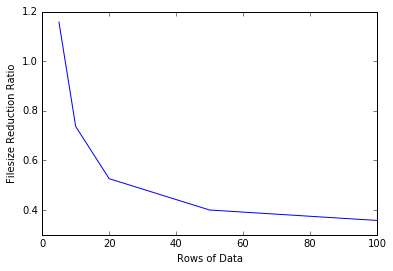

In [87]:
def table_size_ratio(tot_rows=5000):
    sizes = table_split_size_comp(tot_rows)
    return sizes['split'] / sizes['full']

rownums = [5, 10, 20, 50, 100]
kb_sizes = list(map(table_size_ratio, rownums))
plt.plot(rownums, kb_sizes); plt.xlabel('Rows of Data'); plt.ylabel('Filesize Reduction Ratio')

## Benefits of Multiple Tables: More Natural Data Organization

For example, this experiment can be organized into four tables:
  - **Recording Session Details** (Keys: Session, Stimulus, Rat)
  - **Rat Head Position Tracking Data** (Key: Session)
  - **Rat Details** (Key: Rat)
  - **Stimulus Details** (Key: Stimulus)

# Relational Databases

## Relational Databases
Data Organized into Multiple, Related Tables that Relate to Each Other are called **Relational Databases**

In [94]:
HTML('<iFrame src="https://www.ibm.com/developerworks/library/x-matters8/relat.gif" width=600 height=350></iFrame>')

## Relational Databases Allow The Organization of Even Very Complex Datasets

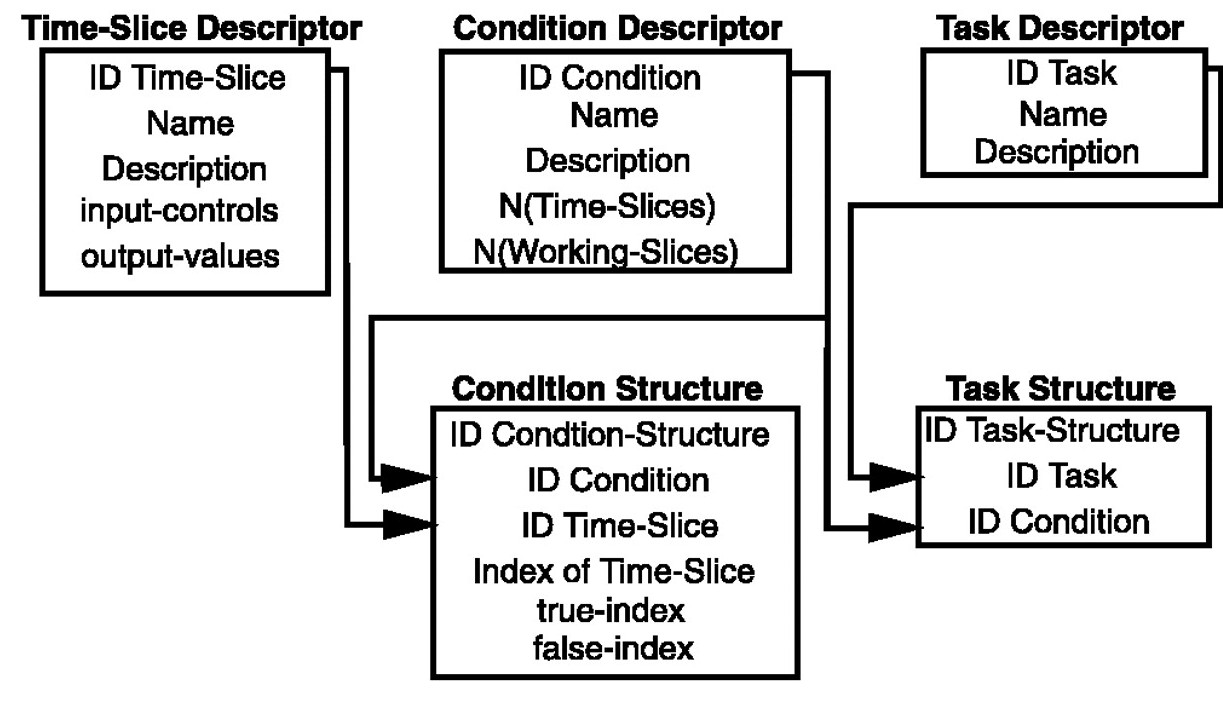

In [100]:
Image('rel_database_diagram.jpg', width=650)

## Relational Database Software Exists to Help Store, Manage, and Get Data
  - **Describing Data Content**: All Tables contain correct data type
  - **Interpret Data Format**: Optimizes data storage for fast write/read speeds
  - **Easy Filtering and Querying**: Can quickly organize your data before you work with it in Python.
  - **Modification Protection**
  - **Backup**: Can do regular data backups
  - **Security**: Assign data ownership to certain Users
  - **Remote Access**: Can send data over a network

## Relational Database Software: SQL Programs
  - Simple, Single-File Based (Fast and Easy to use)
      - **SQLite**, **Microsoft Access**
  - Programs that Need to Run in Background (Super-super-fast, more challenging to use):
      - **MySQL**, **PostgreSQL**
      
For a larger (but not-exhaustive) list of relational database software: https://en.wikipedia.org/wiki/Comparison_of_relational_database_management_systems

## SQL: A Language for Talking to Database Software
SQL Example: "Get X,Y,Z positions and the rat name from my tables, but only FuzzPatch's data"
```sql
SELECT X, Y, Z, rat FROM behavior, rats WHERE rat='FuzzPatch';
```
Using with Python, SQLAlchemy, and Pandas: 
```python
import sqlalchemy 
connection = sqlalchemy.create_engine('sqllite:///database.db')
df = pd.read_sql_query("SELECT X, Y, Z, rat FROM behavior, rats WHERE rat='FuzzPatch';", connection)
```

## Should I Use Relational Database Software?

**As a student, Probably not, because**:
  - Using them and setting them up is extra work, 
  - Read Speed benefits 1/3 of HDF5
  - Operating systems give you most of the features you'll want
  - Read/Write Times are fast enough most of the time.
  - Excel and HDF5 files already support organize data in nice tables.
  

**As a PI, possibly yes, because:**
  - Most of your lab's data will be encouraged to be organized into similar formats and in same location, 
  - New analyses can be done on existing data by new students
  - New analyses can be done that join together multiple studies.
  - Data Loss and Corruption is more likely over longer time periods.
  - Data Reorganiztion is time intensive, so it saves time in the long-run.
  - Free papers from reinterpretation of data!

## Reccomendation: Follow this Sequence to Speed Up Data Read Times

  1. Single Table: CSV
  2. Single Table: HDF5 (300x Faster)
  3. Multiple-Table: HDF5 (3-6x Faster, better-organized data)
  4. Read Only the Columns and Rows You Actually Need (Pandas.HDFStore) (~2x Faster)
  5. Buy more RAM For your computer (2-3x Faster, ~80 Euros)
  6. Buy an SSD For your computer (2-4x Faster, ~120 Euros)
  7. No, you don't need voltage measurements every picosecond--the brain doesn't spike *that* fast.  Downsample your data.
  8. Query your data with Python's Blaze package.
  9. Is your computer more than 4 years old? Okay, buy a new computer. (~3-10x Faster)
  

# Questions/Discussion
For more details on data read/write performance:
  - http://pandas-docs.github.io/pandas-docs-travis/io.html#io-perf
  - https://sqlite.org/speed.html